In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

import seaborn as sns ##Importação para aumentar as capacidades de plot
sns.set_theme() ##Colocando o tema padrão do Seaborn
sns.set_style('whitegrid')

import missingno as msno

from sklearn.preprocessing import StandardScaler
from scipy import stats

df = pd.read_csv(filepath_or_buffer='./vgsales.csv')
df.head()
drop_row_index = df[df['Year'] > 2015].index
df = df.drop(drop_row_index)



Grupo de dados e campos a serem usados

In [9]:
print(df) #Não excluir

<class 'pandas.core.frame.DataFrame'>
Index: 16250 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16250 non-null  int64  
 1   Name          16250 non-null  object 
 2   Platform      16250 non-null  object 
 3   Year          15979 non-null  float64
 4   Genre         16250 non-null  object 
 5   Publisher     16194 non-null  object 
 6   NA_Sales      16250 non-null  float64
 7   EU_Sales      16250 non-null  float64
 8   JP_Sales      16250 non-null  float64
 9   Other_Sales   16250 non-null  float64
 10  Global_Sales  16250 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.5+ MB


Hipótese de investigação do conjunto de dados escolhidos:
Com a grande evolução dos jogos modernos, será que os jogos antigos lançados em antigos videogames forma deixados para trás e são apenas lembrados como nostalgia ou existe uma hegemonia dos jogos atuais?

Estatísticas descritivas:

In [3]:
df.describe()

,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,16598.000000,16327.000000,16598.000000,16598.000000,16598.000000,16598.000000,16598.000000
mean,8300.605254,2006.406443,0.264667,0.146652,0.077782,0.048063,0.537441
std,4791.853933,5.828981,0.816683,0.505351,0.309291,0.188588,1.555028
min,1.000000,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,4151.250000,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000
50%,8300.500000,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000
75%,12449.750000,2010.000000,0.240000,0.110000,0.040000,0.040000,0.470000
max,16600.000000,2020.000000,41.490000,29.020000,10.220000,10.570000,82.740000


      Rank       Name Platform    Year     Genre   Publisher  NA_Sales  \
1969  1971   Defender     2600  1980.0      Misc       Atari      0.99   
258    259  Asteroids     2600  1980.0   Shooter       Atari      4.00   
5366  5368    Freeway     2600  1980.0    Action  Activision      0.32   
2669  2671     Boxing     2600  1980.0  Fighting  Activision      0.72   
6896  6898   Checkers     2600  1980.0      Misc       Atari      0.22   

      EU_Sales  JP_Sales  Other_Sales  Global_Sales  
1969      0.05       0.0         0.01          1.05  
258       0.26       0.0         0.05          4.31  
5366      0.02       0.0         0.00          0.34  
2669      0.04       0.0         0.01          0.77  
6896      0.01       0.0         0.00          0.24  


<BarContainer object of 136 artists>

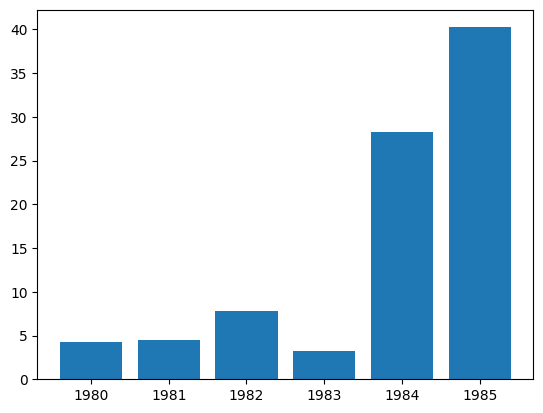

In [4]:
df = df.sort_values(by='Year')
print(df.head())

dfAntigo = df[df['Year'] <= 1985]

plt.bar(data=dfAntigo,x=dfAntigo['Year'],height=dfAntigo['Global_Sales'])

Quais os Gêneros mais produzidos

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
 [Text(0, 0, 'Action'),
  Text(1, 0, 'Sports'),
  Text(2, 0, 'Misc'),
  Text(3, 0, 'Role-Playing'),
  Text(4, 0, 'Shooter'),
  Text(5, 0, 'Adventure'),
  Text(6, 0, 'Racing'),
  Text(7, 0, 'Platform'),
  Text(8, 0, 'Simulation'),
  Text(9, 0, 'Fighting'),
  Text(10, 0, 'Strategy'),
  Text(11, 0, 'Puzzle')])

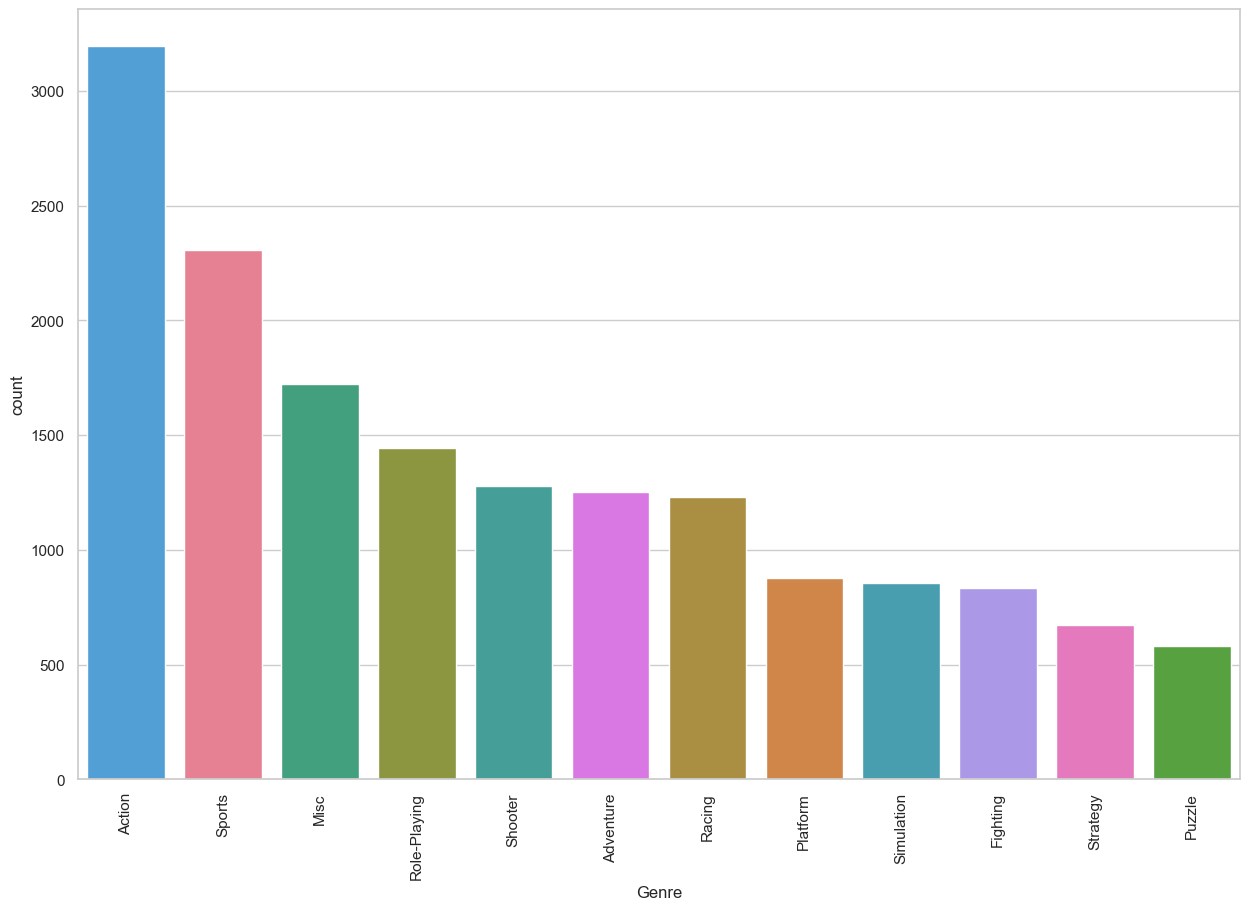

In [ ]:
plt.figure(figsize=(15, 10))
sns.countplot(x="Genre", data=df, order = df['Genre'].value_counts().index,hue='Genre') ##Criando uma plot de contagem (de gênero) tendo como
#o eixo x o gênero, e ordenado pelo mesmo, hue muda as cores para melhor visualização
plt.xticks(rotation=90) ##Rotacionar em 90° a legenda do eixo x

Anos com o maior número de lançamento de jogos

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35],
 [Text(0, 0, '1980.0'),
  Text(1, 0, '1981.0'),
  Text(2, 0, '1982.0'),
  Text(3, 0, '1983.0'),
  Text(4, 0, '1984.0'),
  Text(5, 0, '1985.0'),
  Text(6, 0, '1986.0'),
  Text(7, 0, '1987.0'),
  Text(8, 0, '1988.0'),
  Text(9, 0, '1989.0'),
  Text(10, 0, '1990.0'),
  Text(11, 0, '1991.0'),
  Text(12, 0, '1992.0'),
  Text(13, 0, '1993.0'),
  Text(14, 0, '1994.0'),
  Text(15, 0, '1995.0'),
  Text(16, 0, '1996.0'),
  Text(17, 0, '1997.0'),
  Text(18, 0, '1998.0'),
  Text(19, 0, '1999.0'),
  Text(20, 0, '2000.0'),
  Text(21, 0, '2001.0'),
  Text(22, 0, '2002.0'),
  Text(23, 0, '2003.0'),
  Text(24, 0, '2004.0'),
  Text(25, 0, '2005.0'),
  Text(26, 0, '2006.0'),
  Text(27, 0, '2007.0'),
  Text(28, 0, '2008.0'),
  Text(29, 0, '2009.0'),
  Text(30, 0, '2010.0'),
  Text(31, 0, '2011.0'),
  T

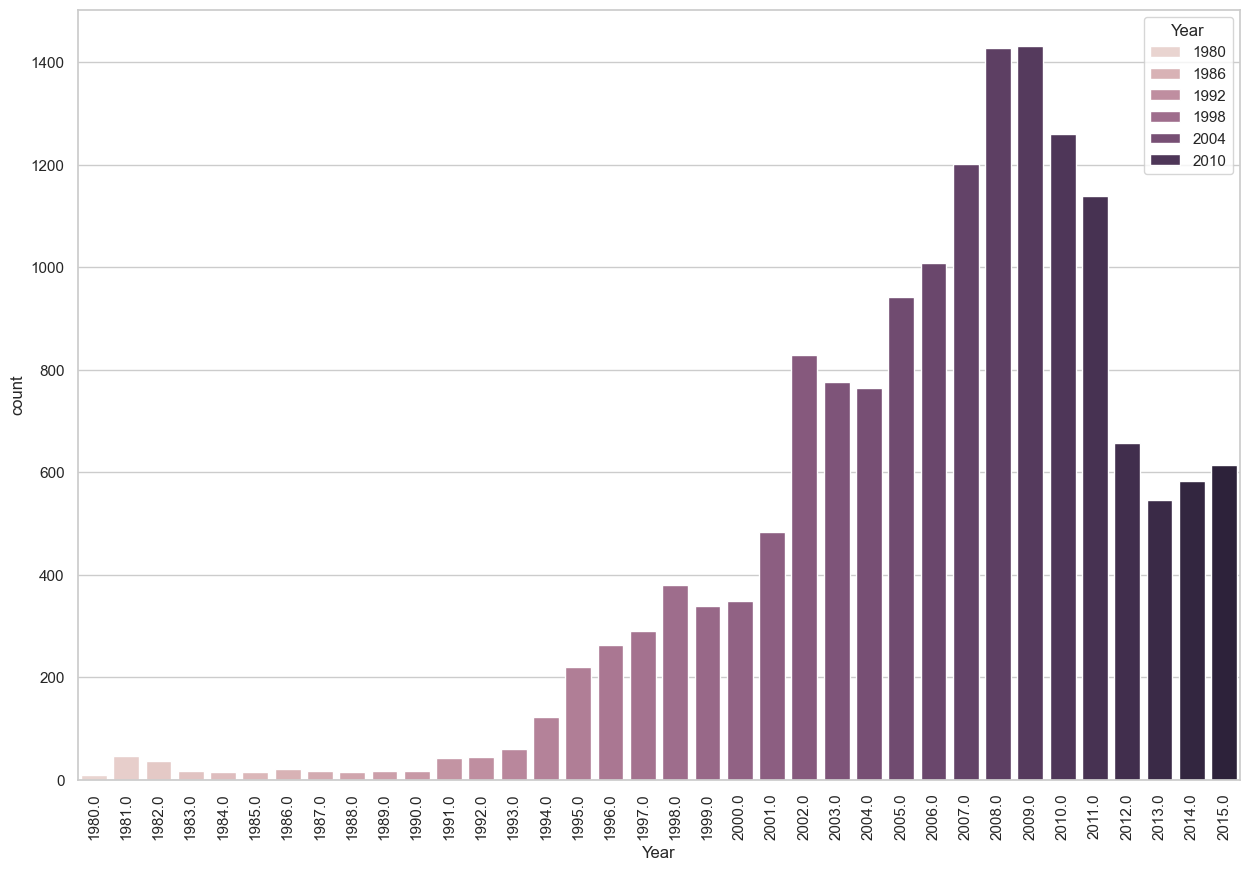

In [34]:
plt.figure(figsize=(15, 10)) ##Setando o tamanho da 'figura'
sns.countplot(x="Year",
            data=df,
            order = df.groupby(by=['Year'])['Name'].count().index,
            hue='Year') ##Mesmo estilo de plotagem do gráfico anterior, porem ordenado por 
#ano e 'apenas contando' os nomes correspondentes
plt.xticks(rotation=90)

Top 5 anos de lançamento por gênero

([0, 1, 2, 3, 4],
 [Text(0, 0, '2009.0'),
  Text(1, 0, '2008.0'),
  Text(2, 0, '2010.0'),
  Text(3, 0, '2007.0'),
  Text(4, 0, '2011.0')])

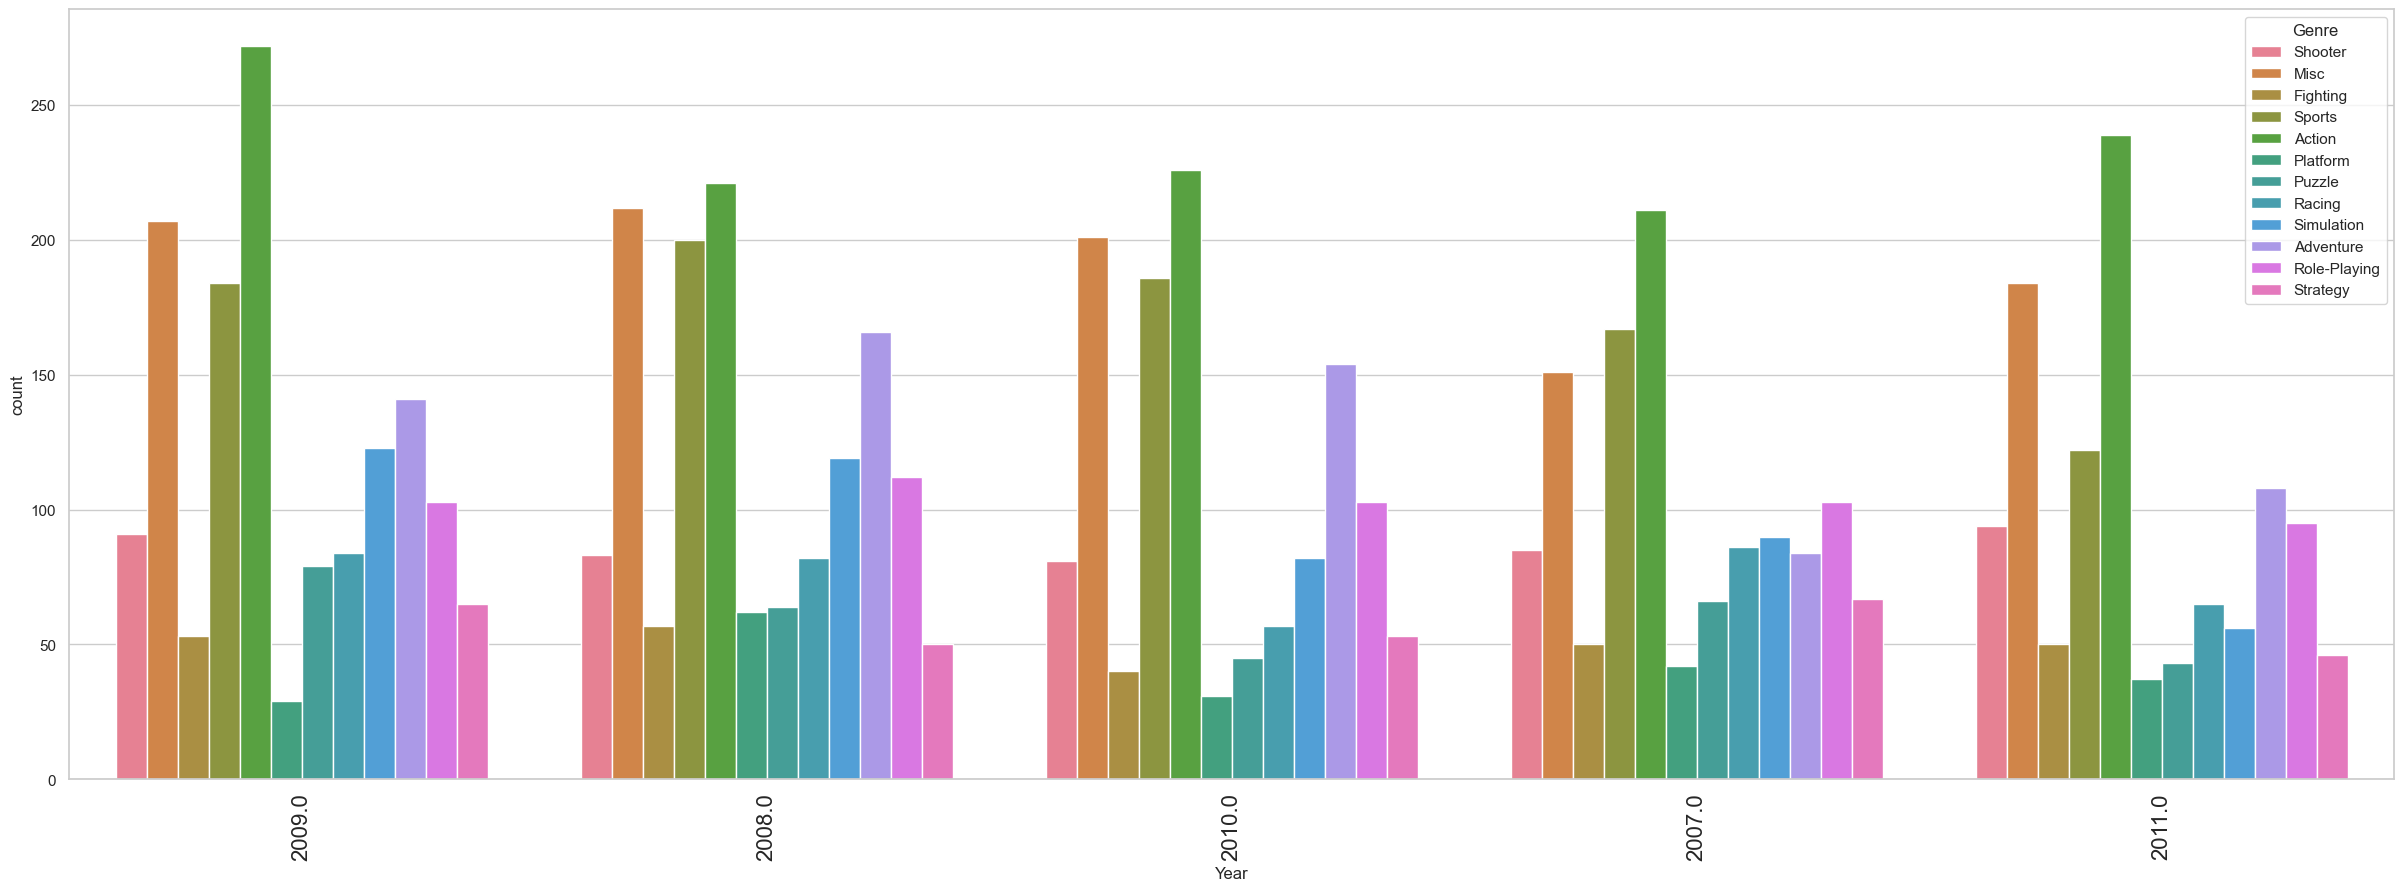

In [36]:
plt.figure(figsize=(30,10))

sns.countplot(x = 'Year', data=df, hue= 'Genre', order=df.Year.value_counts().iloc[:5].index) ##Mesmo plotting, porém ordenando pela 
#'quantidade' de valores nos anos, selecionando apenas os 5 maiores
plt.xticks(size=16, rotation=90)

Gráfico crescente de vendas mundial

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35],
 [Text(0, 0, '1980.0'),
  Text(1, 0, '1981.0'),
  Text(2, 0, '1982.0'),
  Text(3, 0, '1983.0'),
  Text(4, 0, '1984.0'),
  Text(5, 0, '1985.0'),
  Text(6, 0, '1986.0'),
  Text(7, 0, '1987.0'),
  Text(8, 0, '1988.0'),
  Text(9, 0, '1989.0'),
  Text(10, 0, '1990.0'),
  Text(11, 0, '1991.0'),
  Text(12, 0, '1992.0'),
  Text(13, 0, '1993.0'),
  Text(14, 0, '1994.0'),
  Text(15, 0, '1995.0'),
  Text(16, 0, '1996.0'),
  Text(17, 0, '1997.0'),
  Text(18, 0, '1998.0'),
  Text(19, 0, '1999.0'),
  Text(20, 0, '2000.0'),
  Text(21, 0, '2001.0'),
  Text(22, 0, '2002.0'),
  Text(23, 0, '2003.0'),
  Text(24, 0, '2004.0'),
  Text(25, 0, '2005.0'),
  Text(26, 0, '2006.0'),
  Text(27, 0, '2007.0'),
  Text(28, 0, '2008.0'),
  Text(29, 0, '2009.0'),
  Text(30, 0, '2010.0'),
  Text(31, 0, '2011.0'),
  T

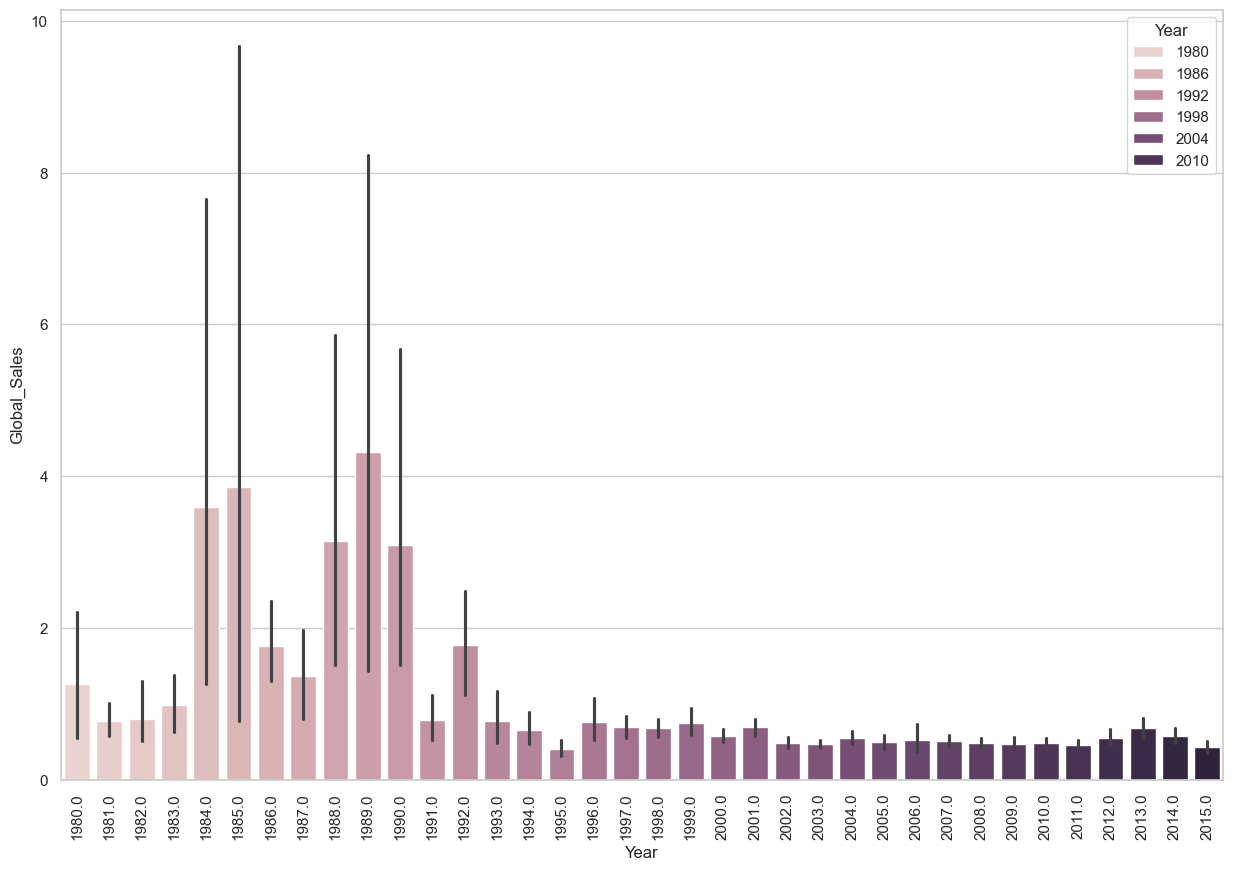

In [37]:
data_year = df.groupby(by=['Year'])['Global_Sales'].sum() ##Criando uma var agrupando por quantidade de vendas no ano
data_year = df.reset_index()## resetando o índice para mais fácil visualização
data_year.sort_values(by=['Global_Sales'], ascending=False) ##organizando pelas vendas globais

plt.figure(figsize=(15, 10))
sns.barplot(x="Year",           ##Eixo x == ano
            y="Global_Sales",   ##Eixo y == vendas globais
            data=data_year,     ##Base de dados "data_year"
            hue="Year")         ##Cor muda de acordo com o ano
plt.xticks(rotation=90)

Top publicadores

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19],
 [Text(0, 0, 'Electronic Arts'),
  Text(1, 0, 'Activision'),
  Text(2, 0, 'Ubisoft'),
  Text(3, 0, 'Namco Bandai Games'),
  Text(4, 0, 'Konami Digital Entertainment'),
  Text(5, 0, 'THQ'),
  Text(6, 0, 'Nintendo'),
  Text(7, 0, 'Sony Computer Entertainment'),
  Text(8, 0, 'Sega'),
  Text(9, 0, 'Take-Two Interactive'),
  Text(10, 0, 'Capcom'),
  Text(11, 0, 'Atari'),
  Text(12, 0, 'Tecmo Koei'),
  Text(13, 0, 'Disney Interactive Studios'),
  Text(14, 0, 'Square Enix'),
  Text(15, 0, 'Warner Bros. Interactive Entertainment'),
  Text(16, 0, 'Midway Games'),
  Text(17, 0, 'Eidos Interactive'),
  Text(18, 0, '505 Games'),
  Text(19, 0, 'Microsoft Game Studios')])

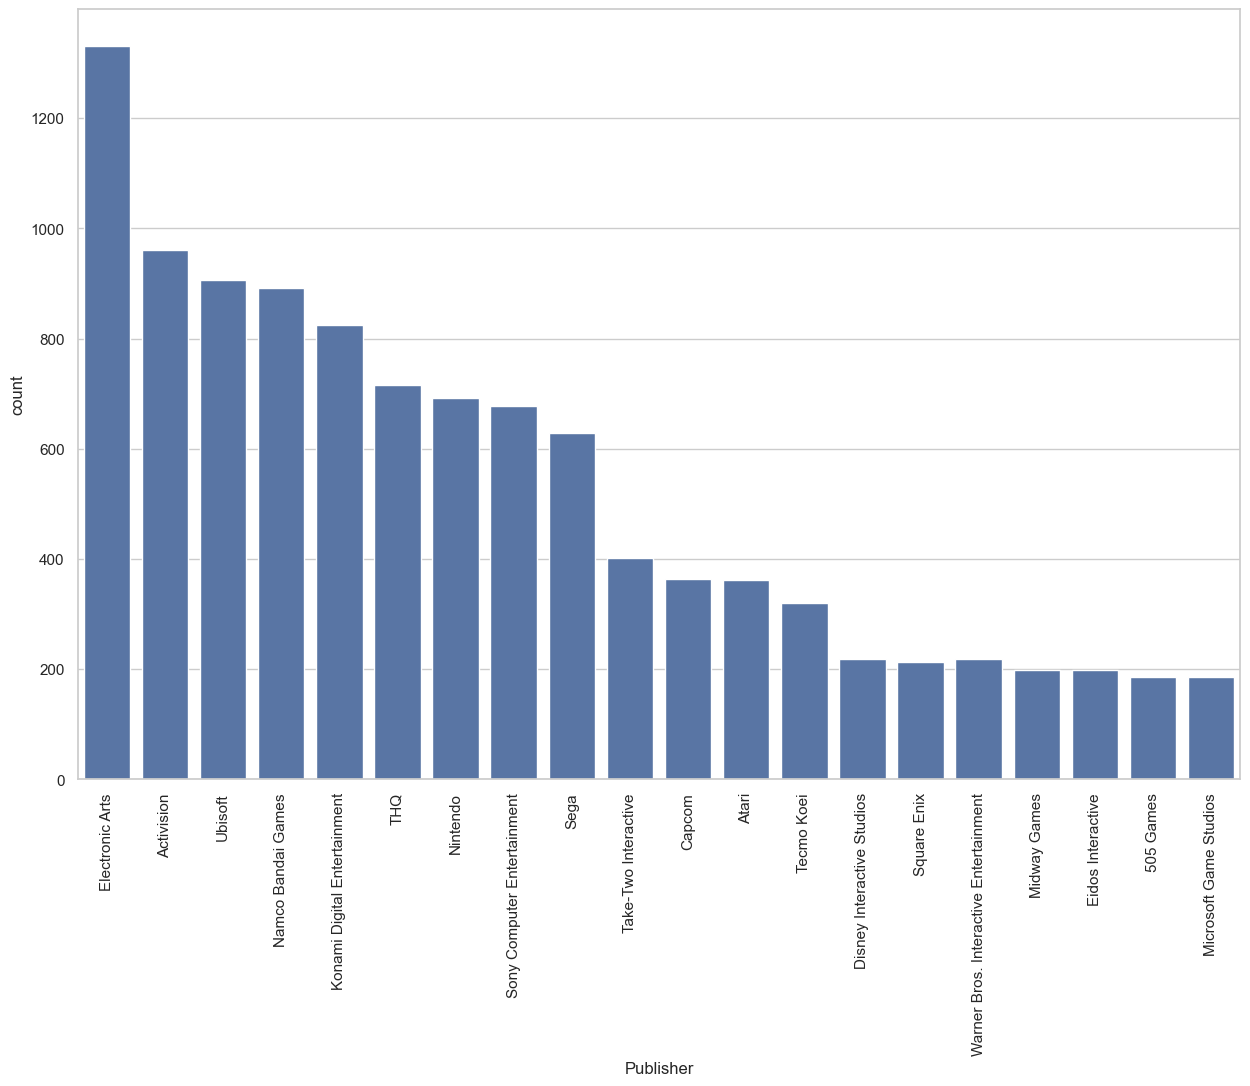

In [44]:
top_publisher = df.groupby(by=['Publisher'])['Year'].count().sort_values(ascending=False).head(20)
top_publisher = pd.DataFrame(top_publisher).reset_index()

plt.figure(figsize=(15, 10))
sns.countplot(x="Publisher",    ##Eixo x == publicador
              data=df,          ##Dados 'df' (Data Frame principal)
              order = df.groupby(by=['Publisher'])['Year'].count().sort_values(ascending=False).iloc[:20].index,
              ) ##Ordenando por publicador contando apenas o ano, 
#organizando em valores ascendentes, mostrando apenas os primeiros 20 contando à partir do índice
plt.xticks(rotation=90)#Rotaciona a legenda do eixo x em 90°

Arrecadação total por região

<Axes: xlabel='region', ylabel='sale'>

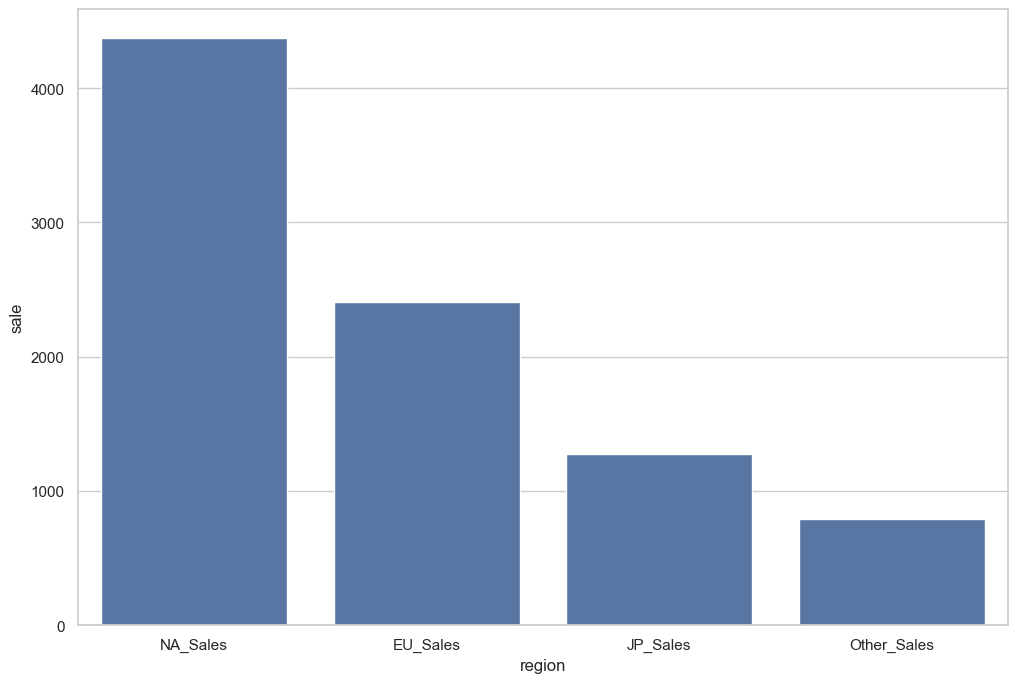

In [46]:
top_sale_reg = df[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']]      ##Criando uma var com apenas as vendas
# pd.DataFrame(top_sale_reg.sum(), columns=['a', 'b'])
top_sale_reg = top_sale_reg.sum().reset_index()                             ##resetando o índice e pegando a soma total apenas
top_sale_reg = top_sale_reg.rename(columns={"index": "region", 0: "sale"})  ##Renomeando as colunas para ficar mais fácil de entender
top_sale_reg

plt.figure(figsize=(12, 8))
sns.barplot(x='region', y='sale', data = top_sale_reg, hue=None)

([<matplotlib.patches.Wedge at 0x257ce96e660>,
 [Text(-1.099810197514193, 0.020433537231518254, 'NA_Sales'),
  Text(0.8027108280998408, -0.7521006092613328, 'EU_Sales'),
  Text(0.9343594166145676, 0.5804933079577105, 'JP_Sales'),
  Text(0.3046251732378847, 1.0569784784137228, 'Other_Sales')],
 [Text(-0.5998964713713779, 0.011145565762646319, '49.4%'),
  Text(0.43784226987264047, -0.4102366959607269, '27.2%'),
  Text(0.5096505908806731, 0.3166327134314784, '14.4%'),
  Text(0.16615918540248253, 0.5765337154983943, '8.9%')])

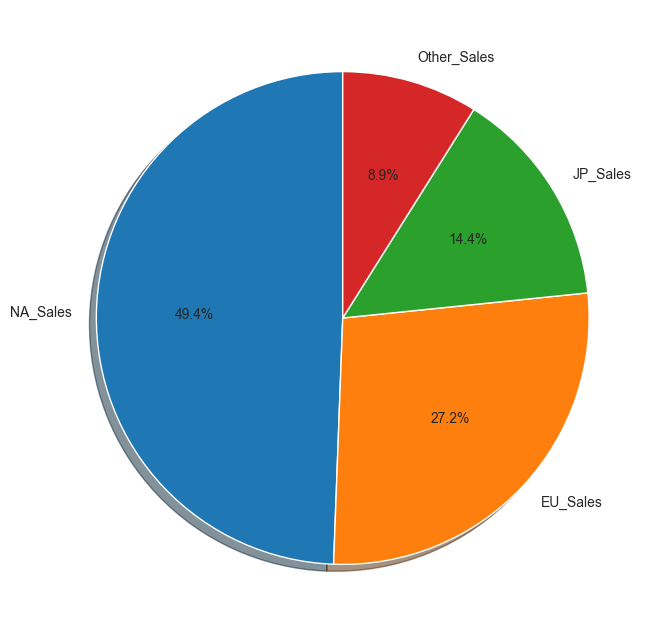

In [21]:
labels = top_sale_reg['region']
sizes = top_sale_reg['sale']

plt.figure(figsize=(10, 8))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90)

Distribuição de vendas

C:\Users\chris\AppData\Local\Temp\ipykernel_20180\2591843368.py:13: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(np.log(data_hist_log[column]), bins=20, kde=False, fit=stats.gamma)


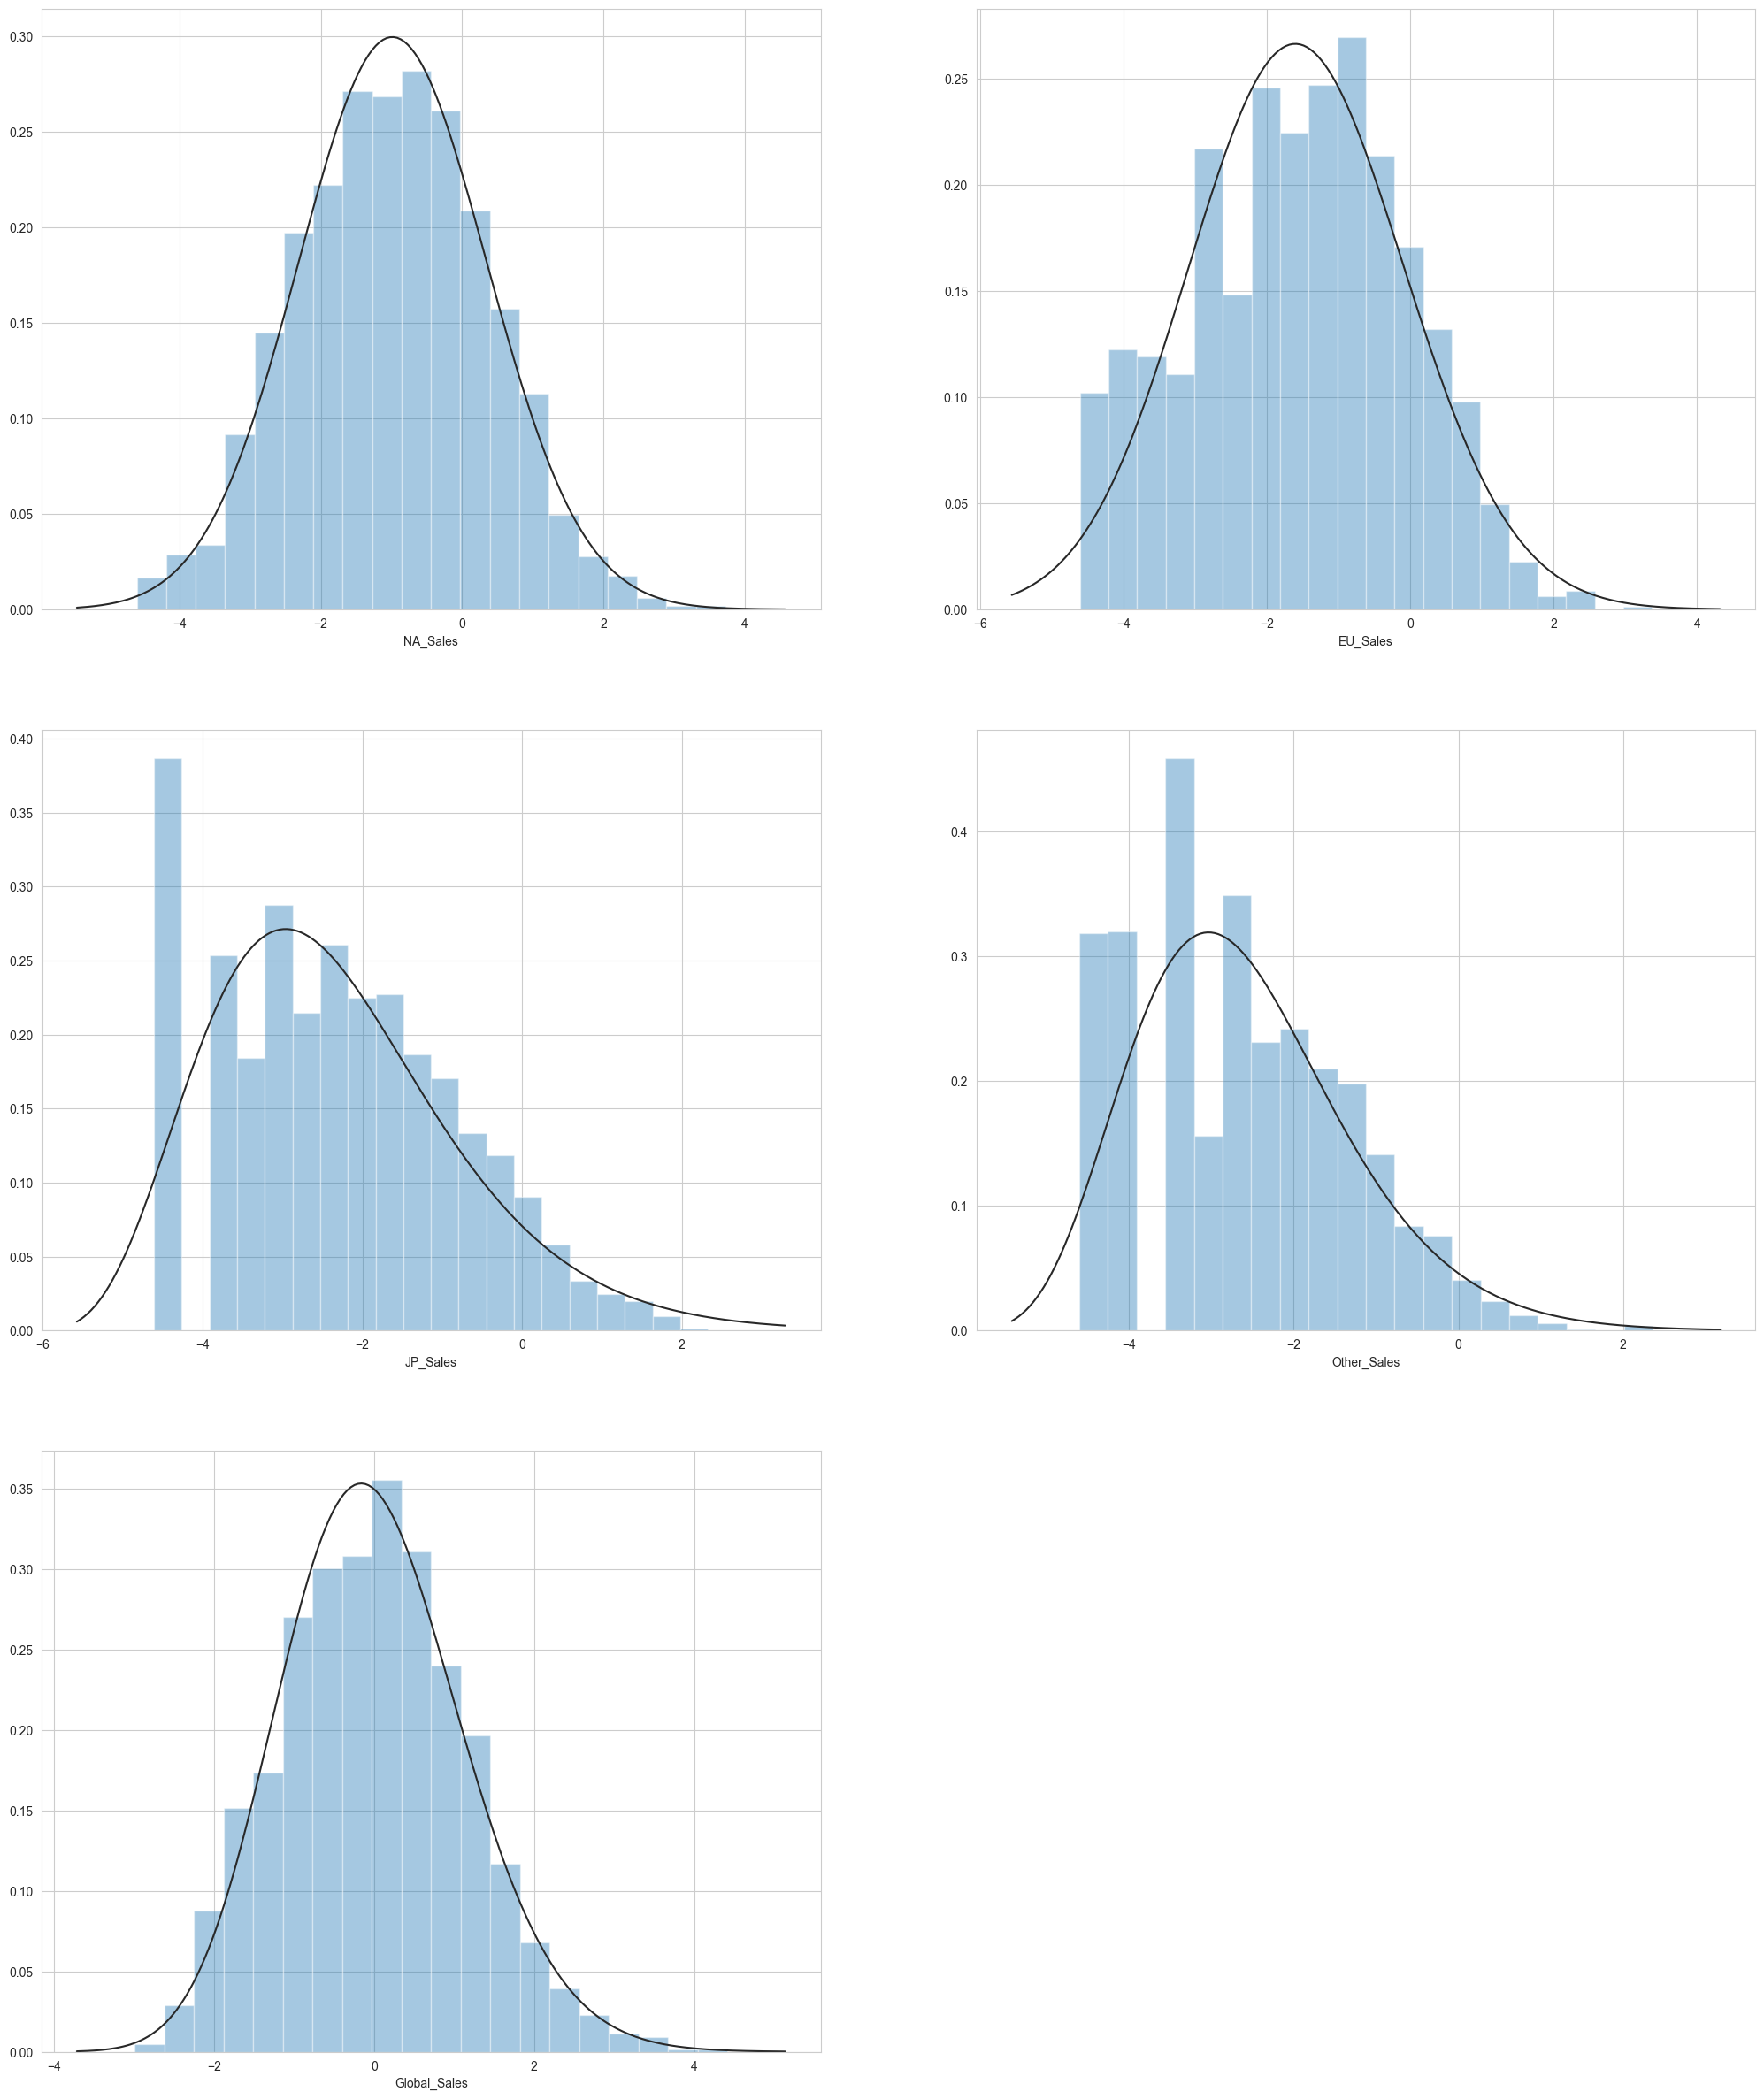

In [26]:
data_hist_log = df.copy()

data_hist_log = data_hist_log[data_hist_log.NA_Sales != 0]
data_hist_log = data_hist_log[data_hist_log.EU_Sales != 0]
data_hist_log = data_hist_log[data_hist_log.Other_Sales != 0]
data_hist_log = data_hist_log[data_hist_log.JP_Sales != 0]
data_hist_log = data_hist_log[data_hist_log.Global_Sales != 0]

plt.figure(figsize=(25,30))
sales_columns = ['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales']
for i, column in enumerate(sales_columns):
    plt.subplot(3,2,i+1)
    sns.distplot(np.log(data_hist_log[column]), bins=20, kde=False, fit=stats.gamma)

Mapa de calor de distribuição

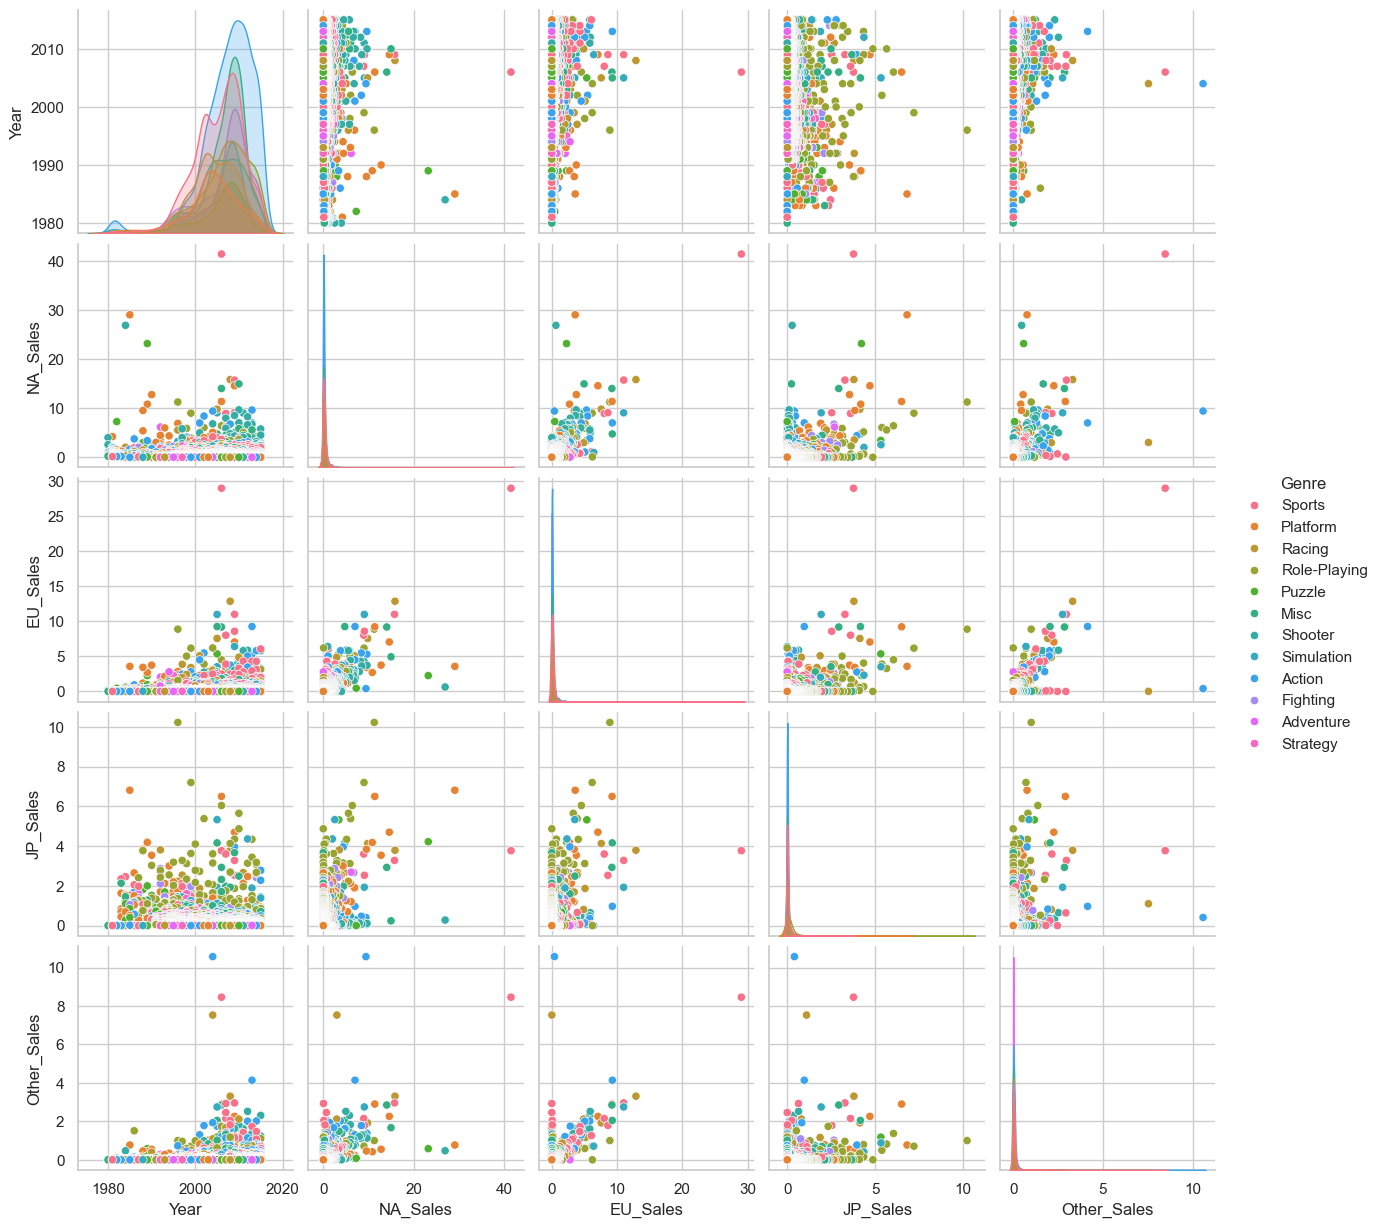

In [3]:
data_pair = df.loc[:,["Year","Platform", "Genre", "NA_Sales","EU_Sales", "JP_Sales", "Other_Sales"]]
data_pair

sns.pairplot(data_pair, hue='Genre')